In [27]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

x=np.array([2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5, 6. , 6.5, 7. , 7.5, 8. ,
       8.5, 9. , 9.5])

y=np.array([159.57209984, 159.8851819 , 159.89378952, 160.30305273,
       160.84630757, 160.94703969, 161.56961845, 162.31468058,
       162.32140561, 162.88880047, 163.53234609, 163.85817086,
       163.55339958, 163.86393263, 163.90535931, 163.44385491])

In [28]:
lam0 = np.array([100, 120, 3, -1],dtype=np.float64)
tol = 1e-5
p = sp.symbols('p:{n:d}'.format(n=lam0.size))
p

(p0, p1, p2, p3)

In [29]:
def f(x,p):
    return (p[0]+p[1]*10**(p[2]+p[3]*x))/(1+10**(p[2]+p[3]*x))

In [30]:
g = sp.Matrix([y[k]-f(x[k],p) for k in range(len(x))])

In [31]:
Dg = g.jacobian(p)

In [32]:
g = sp.lambdify([p], g, 'numpy')
Dg = sp.lambdify([p], Dg, 'numpy')

In [33]:
k=0
lam=np.copy(lam0)
[Q,R] = np.linalg.qr(Dg(lam))
delta = np.linalg.solve(R,-Q.T @ g(lam)).flatten()  # Achtung: flatten() braucht es, um aus dem Spaltenvektor delta wieder eine Liste zu machen, da g hier nicht mit Spaltenvektoren als Input umgehen kann
delta 

array([63.13929502, 37.07214103,  1.34173402, -0.45156159])

In [34]:
lam = lam+delta
lam

array([163.13929502, 157.07214103,   4.34173402,  -1.45156159])

In [35]:
# Inkrement
increment = np.linalg.norm(delta)
increment

73.23194913131235

In [36]:
# Fehlerfunktional des Startvektors lam0
err_func0 = np.linalg.norm(g(lam0))**2
err_func0

56222.21841571913

In [37]:
# Fehlerfunktional nach der ersten Iteration
err_func = np.linalg.norm(g(lam))**2
err_func

27.15746246432478

In [38]:
def gauss_newton_d(g, Dg, lam0, tol, max_iter, pmax, damping):
    k=0
    lam=np.copy(lam0)
    increment = tol+1
    err_func = np.linalg.norm(g(lam))**2
    
    while (increment > tol and k < max_iter):
        # QR-Zerlegung von Dg(lam)
        [Q,R] = np.linalg.qr(Dg(lam))
        delta = np.linalg.solve(R,-Q.T @ g(lam)).flatten()           # Achtung: flatten() braucht es, um aus dem Spaltenvektor delta wieder
                                                                     # eine "flachen" Vektor zu machen, da g hier nicht mit Spaltenvektoren als Input umgehen kann           
        # hier kommt die Däfmpfung, falls damping = 1
        p=0
        while damping==1 and np.linalg.norm(g(lam+delta/2**p))**2 > err_func:
            p+=1
            if p>pmax:
                p=0
                break
               
        # Update des Vektors Lambda        
        lam = lam+delta/2**p
        err_func = np.linalg.norm(g(lam))**2
        increment = np.linalg.norm(delta)
        k = k+1
        print('Iteration: ',k)
        print('lambda = ',lam)
        print('Inkrement = ',increment)
        print('Fehlerfunktional =', err_func)
    return(lam,k)

In [39]:
tol = 1e-5
max_iter = 30
pmax = 5
damping = 1
[lam_with,n] = gauss_newton_d(g, Dg, lam0, tol, max_iter, pmax, damping)

Iteration:  1
lambda =  [163.13929502 157.07214103   4.34173402  -1.45156159]
Inkrement =  73.23194913131235
Fehlerfunktional = 27.15746246432478
Iteration:  2
lambda =  [163.02855335 157.67719052   1.52464763  -0.46773222]
Inkrement =  6.093355236156653
Fehlerfunktional = 6.306237392403398
Iteration:  3
lambda =  [163.43938891 157.39314475   0.78716853  -0.22676767]
Inkrement =  1.8454345920867432
Fehlerfunktional = 4.450011745808803
Iteration:  4
lambda =  [163.47381305 159.06035085   1.2516163   -0.28554606]
Inkrement =  6.928119904158262
Fehlerfunktional = 3.144488293746804
Iteration:  5
lambda =  [163.7391953  160.34802509   2.4675542   -0.46926011]
Inkrement =  1.8002190230693036
Fehlerfunktional = 2.7490158679473544
Iteration:  6
lambda =  [163.88565667 159.51067822   2.10407209  -0.41889869]
Inkrement =  0.925881324042069
Fehlerfunktional = 0.6282145560271954
Iteration:  7
lambda =  [163.88059443 159.4746335    2.17366801  -0.42980547]
Inkrement =  0.07929311368656132
Fehlerfun

In [40]:
t = sp.symbols('t')
F = f(t,lam_with)
F = sp.lambdify([t],F,'numpy')
t = np.linspace(x.min(),x.max())

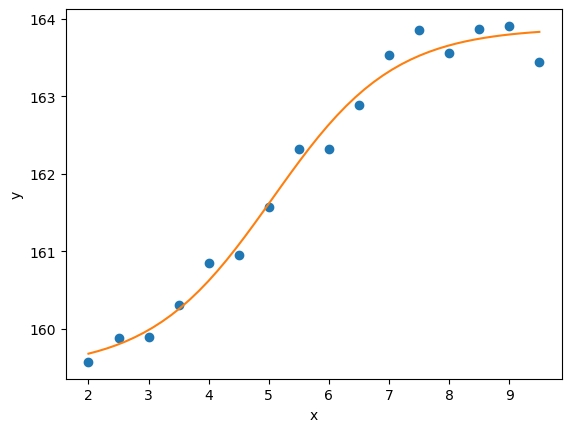

In [41]:
plt.plot(x,y,'o')
plt.plot(t,F(t))
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [42]:
damping = 0
[lam_with,n] = gauss_newton_d(g, Dg, lam0, tol, max_iter, pmax, damping)

#das ungedämpfte Verfahren divergiert

Iteration:  1
lambda =  [163.13929502 157.07214103   4.34173402  -1.45156159]
Inkrement =  73.23194913131235
Fehlerfunktional = 27.15746246432478
Iteration:  2
lambda =  [162.91781168 158.28224001  -1.29243875   0.51609715]
Inkrement =  6.093355236156653
Fehlerfunktional = 249.57304167406878
Iteration:  3
lambda =  [148.82500717 163.69134627  -6.50644142   2.02647326]
Inkrement =  16.041590618745694
Fehlerfunktional = 297.4704590375888
Iteration:  4
lambda =  [159.37397935 162.8537639   -4.27249373   1.27089044]
Inkrement =  10.84176120438279
Fehlerfunktional = 13.709549467635926
Iteration:  5
lambda =  [158.85088236 163.09204294   2.90677837  -1.02190647]
Inkrement =  7.5583908960088735
Fehlerfunktional = 209.08467050256627
Iteration:  6
lambda =  [163.08528285 156.07910402  10.27775176  -3.55307747]
Inkrement =  11.307056875368842
Fehlerfunktional = 48.94434471039341
Iteration:  7
lambda =  [162.59794001 159.18242219  -2.04017613   0.7358693 ]
Inkrement =  13.416202836590513
Fehlerfu

<lambdifygenerated-7>:3: RuntimeWarning: overflow encountered in double_scalars
  return array([[159.57209984 - (10**(p2 + 2.0*p3)*p1 + p0)/(10**(p2 + 2.0*p3) + 1)], [159.8851819 - (10**(p2 + 2.5*p3)*p1 + p0)/(10**(p2 + 2.5*p3) + 1)], [159.89378952 - (10**(p2 + 3.0*p3)*p1 + p0)/(10**(p2 + 3.0*p3) + 1)], [160.30305273 - (10**(p2 + 3.5*p3)*p1 + p0)/(10**(p2 + 3.5*p3) + 1)], [160.84630757 - (10**(p2 + 4.0*p3)*p1 + p0)/(10**(p2 + 4.0*p3) + 1)], [160.94703969 - (10**(p2 + 4.5*p3)*p1 + p0)/(10**(p2 + 4.5*p3) + 1)], [161.56961845 - (10**(p2 + 5.0*p3)*p1 + p0)/(10**(p2 + 5.0*p3) + 1)], [162.31468058 - (10**(p2 + 5.5*p3)*p1 + p0)/(10**(p2 + 5.5*p3) + 1)], [162.32140561 - (10**(p2 + 6.0*p3)*p1 + p0)/(10**(p2 + 6.0*p3) + 1)], [162.88880047 - (10**(p2 + 6.5*p3)*p1 + p0)/(10**(p2 + 6.5*p3) + 1)], [163.53234609 - (10**(p2 + 7.0*p3)*p1 + p0)/(10**(p2 + 7.0*p3) + 1)], [163.85817086 - (10**(p2 + 7.5*p3)*p1 + p0)/(10**(p2 + 7.5*p3) + 1)], [163.55339958 - (10**(p2 + 8.0*p3)*p1 + p0)/(10**(p2 + 8.0*p3) + 

In [43]:
import scipy.optimize

def err_func(x):
    return np.linalg.norm(g(x))**2 # fügen Sie den richtigen Rückgabewert ein

xopt = scipy.optimize.fmin(err_func, lam0)

xopt

Optimization terminated successfully.
         Current function value: 0.591847
         Iterations: 333
         Function evaluations: 573


array([163.88256553, 159.47427156,   2.17225694,  -0.4293443 ])